In [57]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [58]:
from fastai import *
from fastai.text import *

In [59]:
path = untar_data(URLs.IMDB_SAMPLE)
path.ls()

[PosixPath('/home/nbuser/courses/fast-ai/course-v3/nbs/data/imdb_sample/tmp'),
 PosixPath('/home/nbuser/courses/fast-ai/course-v3/nbs/data/imdb_sample/.ipynb_checkpoints'),
 PosixPath('/home/nbuser/courses/fast-ai/course-v3/nbs/data/imdb_sample/texts.csv')]

In [60]:
df = pd.read_csv(path/'texts.csv')
df.head()

,label,text,is_valid
0,negative,Un-bleeping-believable! Meg Ryan doesn't even ...,False
1,positive,This is a extremely well-made film. The acting...,False
2,negative,Every once in a long while a movie will come a...,False
3,positive,Name just says it all. I watched this movie wi...,False
4,negative,This movie succeeds at being one of the most u...,False


In [61]:
df['text'][1]

'This is a extremely well-made film. The acting, script and camera-work are all first-rate. The music is good, too, though it is mostly early in the film, when things are still relatively cheery. There are no really superstars in the cast, though several faces will be familiar. The entire cast does an excellent job with the script.<br /><br />But it is hard to watch, because there is no good end to a situation like the one presented. It is now fashionable to blame the British for setting Hindus and Muslims against each other, and then cruelly separating them into two countries. There is some merit in this view, but it\'s also true that no one forced Hindus and Muslims in the region to mistreat each other as they did around the time of partition. It seems more likely that the British simply saw the tensions between the religions and were clever enough to exploit them to their own ends.<br /><br />The result is that there is much cruelty and inhumanity in the situation and this is very u

In [62]:
data_lm = TextDataBunch.from_csv(path, 'texts.csv')

In [63]:
data_lm.save()

In [64]:
data = load_data(path)

NameError: name 'load_data' is not defined

In [65]:
data = TextClasDataBunch.from_csv(path, 'texts.csv')
data.show_batch()

text,target
"xxbos xxfld 1 xxmaj raising xxmaj victor xxmaj vargas : a xxmaj review \n\n xxmaj you know , xxmaj raising xxmaj victor xxmaj vargas is like sticking your hands into a big , xxunk bowl of xxunk . xxmaj it 's warm and gooey , but you 're not sure if it feels right . xxmaj try as i might , no matter how warm and gooey xxmaj raising xxmaj",negative
"xxbos xxfld 1 xxup the xxup shop xxup around xxup the xxup corner is one of the xxunk and most feel - good romantic comedies ever made . xxmaj there 's just no getting around that , and it 's hard to actually put one 's feeling for this film into words . xxmaj it 's not one of those films that tries too hard , nor does it come",positive
"xxbos xxfld 1 xxmaj now that xxmaj che(2008 ) has finished its relatively short xxmaj australian cinema run ( extremely limited xxunk screen in xxmaj xxunk , after xxunk ) , i can xxunk join both xxunk of "" xxmaj at xxmaj the xxmaj movies "" in taking xxmaj steven xxmaj soderbergh to task . \n\n xxmaj it 's usually satisfying to watch a film director change his style /",negative
"xxbos xxfld 1 i really wanted to love this show . i truly , honestly did . \n\n xxmaj for the first time , gay viewers get their own version of the "" xxmaj the xxmaj bachelor "" . xxmaj with the help of his obligatory "" hag "" xxmaj xxunk , xxmaj james , a good looking , well - to - do thirty - something has the chance",negative
"xxbos xxfld 1 xxmaj to review this movie , i without any doubt would have to quote that memorable scene in xxmaj tarantino 's "" xxmaj pulp xxmaj fiction "" ( xxunk ) when xxmaj jules and xxmaj vincent are talking about xxmaj xxunk xxmaj wallace and what she does for a living . xxmaj jules tells xxmaj vincent that the "" xxmaj only thing she did worthwhile was pilot",negative


In [66]:
data.vocab.itos[:10]

['xxunk',
 'xxpad',
 'xxbos',
 'xxfld',
 'xxmaj',
 'xxup',
 'xxrep',
 'xxwrep',
 'the',
 '.']

In [67]:
data.train_ds[0][0]

Text xxbos xxfld 1 xxmaj terrible acting by xxmaj potter and a flat plot with no tension what so ever . xxmaj and as for the feminist xxunk , it 's laughable . i saw this garbage when it was first released and though i found it tedious beyond belief i 'm glad i did go to see it . xxmaj that 's because i now have an immediate answer to the question ' what 's the worst film you 've ever seen ? ' xxmaj plus , i have the comfort of knowing that every film i see for the rest of my life will be better than xxmaj the xxmaj tango xxmaj lesson . xxmaj but i have to admit i was impressed with the way xxmaj potter wrote a script that would garner the xxunk number of arts xxunk xxunk from around the world ( as is revealed in the closing credits ) . 

 i only very recently saw xxmaj orlando and i can see how xxmaj potter learnt the wrong lessons from making that film . xxmaj all it took was a bunch of xxunk costumes , a few hard xxunk to camera by the leading lady , and a loose plot to seduce the c

In [68]:
data.train_ds[0][0].data[:10]

array([   2,    3,   45,    4,  352,  121,   48,    4, 4595,   11])

In [69]:
data = (TextList.from_csv(path, 'texts.csv', cols='text')
                .split_from_df(col=2)
                .label_from_df(cols=0)
                .databunch())

In [70]:
bs=48

In [71]:
path = untar_data(URLs.IMDB)
path.ls()


[PosixPath('/home/nbuser/courses/fast-ai/course-v3/nbs/data/imdb/train'),
 PosixPath('/home/nbuser/courses/fast-ai/course-v3/nbs/data/imdb/README'),
 PosixPath('/home/nbuser/courses/fast-ai/course-v3/nbs/data/imdb/unsup'),
 PosixPath('/home/nbuser/courses/fast-ai/course-v3/nbs/data/imdb/test'),
 PosixPath('/home/nbuser/courses/fast-ai/course-v3/nbs/data/imdb/imdb.vocab'),
 PosixPath('/home/nbuser/courses/fast-ai/course-v3/nbs/data/imdb/tmp_lm'),
 PosixPath('/home/nbuser/courses/fast-ai/course-v3/nbs/data/imdb/tmp_clas'),
 PosixPath('/home/nbuser/courses/fast-ai/course-v3/nbs/data/imdb/models'),
 PosixPath('/home/nbuser/courses/fast-ai/course-v3/nbs/data/imdb/data_lm.pkl')]

In [72]:
(path/'train').ls()

[PosixPath('/home/nbuser/courses/fast-ai/course-v3/nbs/data/imdb/train/labeledBow.feat'),
 PosixPath('/home/nbuser/courses/fast-ai/course-v3/nbs/data/imdb/train/unsupBow.feat'),
 PosixPath('/home/nbuser/courses/fast-ai/course-v3/nbs/data/imdb/train/pos'),
 PosixPath('/home/nbuser/courses/fast-ai/course-v3/nbs/data/imdb/train/neg')]

In [73]:
data_lm = (TextList.from_folder(path)
           #Inputs: all the text files in path
            .filter_by_folder(include=['train', 'test', 'unsup']) 
           #We may have other temp folders that contain text files so we only keep what's in train and test
            .random_split_by_pct(0.1)
           #We randomly split and keep 10% (10,000 reviews) for validation
            .label_for_lm()           
           #We want to do a language model so we label accordingly
            .databunch(bs=bs))
data_lm.save('data_lm.pkl')

In [46]:
data_lm = load_data(path, 'data_lm.pkl', bs=bs)

NameError: name 'load_data' is not defined

In [74]:
data_lm.show_batch()

idx,text
0,"xxbos xxmaj the xxup dvd was a joke , the audio for the first few minutes was terrible with sound out of sync and xxmaj segals voice not even his xxrep 4 ! xxmaj pathetic ! xxmaj when the audio sync was better in about 5 minutes the poor plot , lines and actors should get another job because the movie business is not where any of them should be"
1,"mystery in a little over an hour . xxmaj what sets this film apart from other movies of the same type is its crackling good dialog , an insidious xxunk xxmaj xxunk suave xxmaj nick xxmaj xxunk clean shaven xxmaj walter xxmaj pigeon ) , his assistant , xxmaj mr xxmaj bartholomew ( beautifully played by xxmaj donald xxmaj meek ) , the innocent xxunk captivating xxmaj florence xxmaj rice"
2,"xxmaj sutherland , xxmaj scacchi , and xxmaj prochnow were - as usual - great performers , the rest of the movie was such a let down . xxmaj it feels like it was put together by a team of adolescents with low level scripts , that is , scripts lacking any depth , awful photography and editing , and hilariously lousy score ! i ca n't believe i was"
3,"xxmaj chad xxmaj allen ) . xxmaj she worked as media director at a high school , but that was not good enough for her lofty aspirations , so she manipulated xxmaj billy and his friend to murder xxmaj greg xxmaj smart , promising them insurance money as pay - off . ( xxmaj there was no money ) . xxmaj there is actually an amusing scene after her husband"
4,"two new players in the team , am smart talented young pitcher ( xxmaj oscar - xxmaj winner : xxmaj tatum o'neal ) and an trouble - maker ( xxmaj jackie xxmaj earle xxmaj haley ) , who can play catch and hit the ball . xxmaj which could bring them to the championship game with the help of two new players , who could actually play the game ."


In [75]:
learn = language_model_learner(data_lm, "AWD_LSTM", drop_mult=0.3)

In [76]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


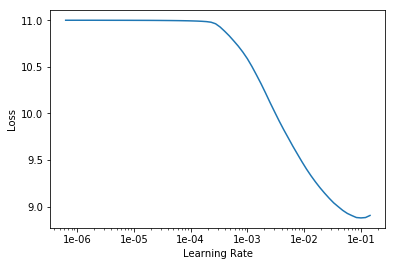

In [77]:
learn.recorder.plot(skip_end=15)

In [78]:
learn.fit_one_cycle(1, 1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy
1,4.201097,4.124211,0.293978


In [53]:
learn.save('fit_head')

In [54]:
learn.load('fit_head');

In [55]:
learn.unfreeze()

In [82]:
learn.fit_one_cycle(10, 1e-3, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy


RuntimeError: cuda runtime error (2) : out of memory at /opt/conda/conda-bld/pytorch-nightly_1540036376816/work/aten/src/THC/generated/../generic/THCTensorMathPointwise.cu:351

### Even by using Crestle I'm facing the "OUT OF MEMORY ERROR" so I executed the other file with reduced cycle length. 